# Multiple Linear Regression Model: Housing dataset 

### Problem statement :
Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

<b>In this process i'll be using manual feature elimination technique 

# Reading and Understanding the data 

In [1]:
# supress warnings 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import required libraries 
import numpy as np 
import pandas as pd 

In [3]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Checking various aspects of housing dataframe 

In [4]:
housing.shape

(545, 13)

In [5]:
# checking null values and data types 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# statistical analysis of the dataframe 
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Visualising the data 

In [7]:
# import required libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

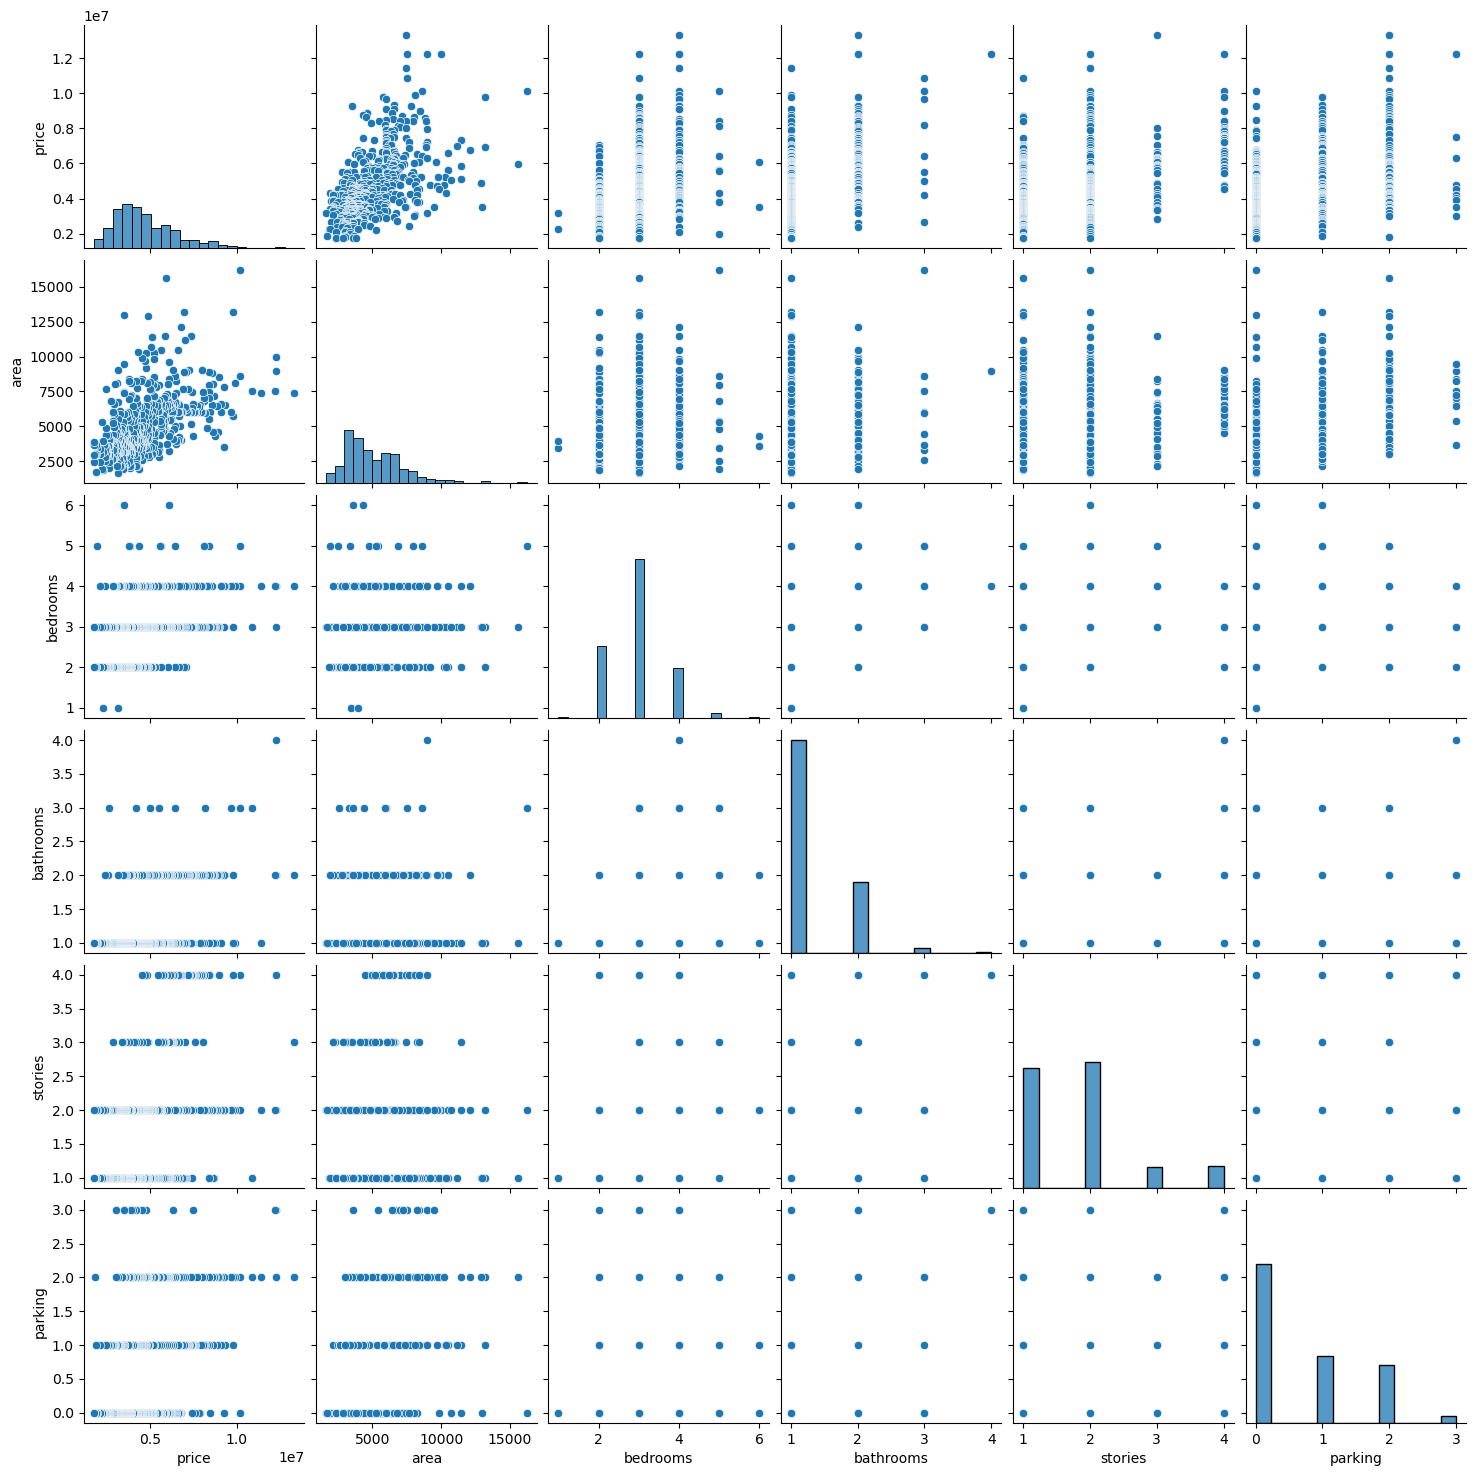

In [8]:
# visualise the numercial variables 
sns.pairplot(housing)
plt.show()

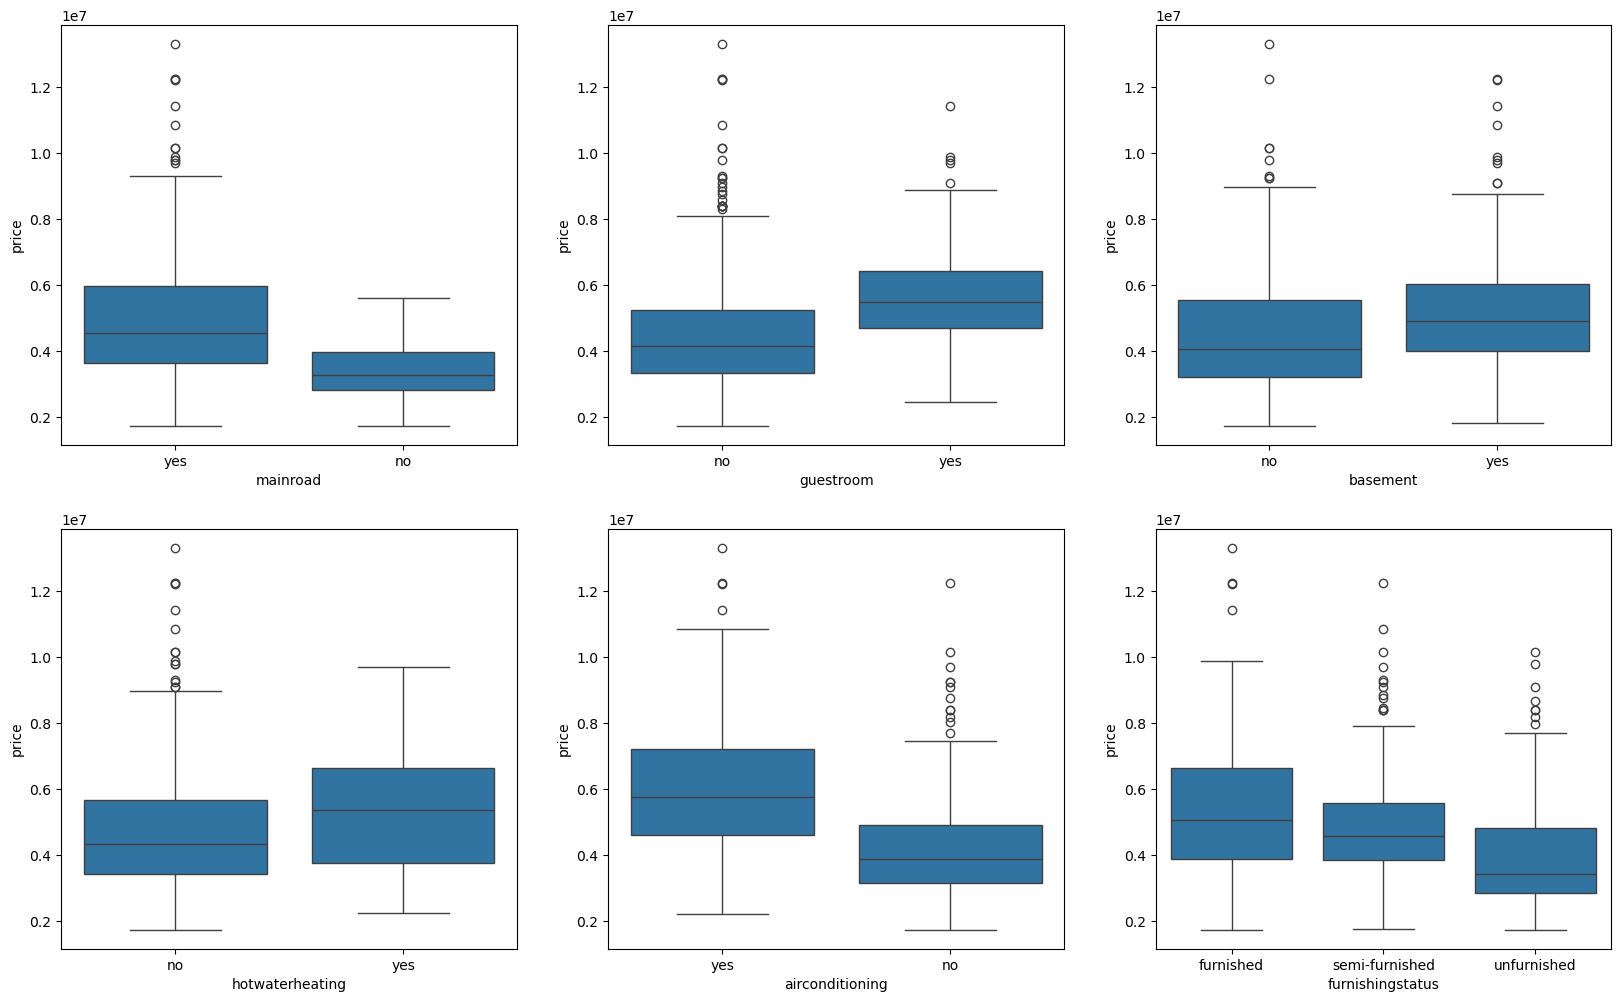

In [9]:
# visualise the categorical variables 
plt.figure(figsize = (20,12))

plt.subplot(2,3,1)
sns.boxplot(x='mainroad' , y = 'price' , data = housing)

plt.subplot(2,3,2)
sns.boxplot(x ='guestroom', y = 'price' , data = housing)

plt.subplot(2,3,3)
sns.boxplot(x ='basement', y = 'price' , data = housing)

plt.subplot(2,3,4)
sns.boxplot(x ='hotwaterheating', y = 'price' , data = housing)

plt.subplot(2,3,5)
sns.boxplot(x ='airconditioning', y = 'price' , data = housing)

plt.subplot(2,3,6)
sns.boxplot(x ='furnishingstatus', y = 'price' , data = housing)

plt.show()

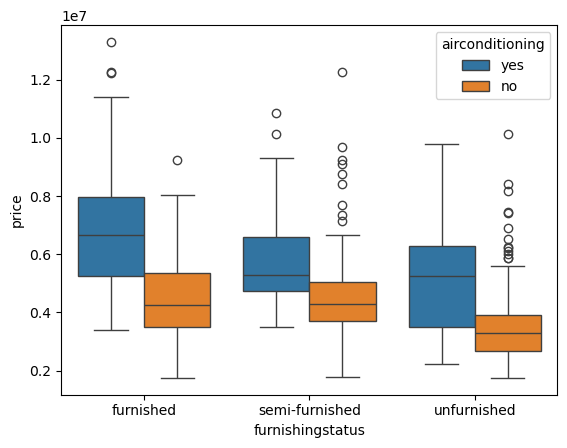

In [10]:
sns.boxplot(x='furnishingstatus' , y='price' , hue = 'airconditioning' , data = housing)
plt.show()

# Data Preparation 
- ENCODING:
    - converting binary vars to 1/0
    - other categorical vars to dummy vars 

In [11]:
# List of all the binary vars i.e yes/no to map to 1/0
varslist =['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
housing[varslist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [12]:
# applying lambda function to map binary vars to numerical values 
housing[varslist] = housing[varslist].apply(lambda x: x.map({'yes': 1 , 'no' : 0}))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


- Dummy variables: The feature `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

In [13]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [14]:
# drop the redundant variable & convert booleans to 0 and 1 
status = pd.get_dummies(housing['furnishingstatus'], drop_first =True).astype(int)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [15]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [16]:
# add the result to the original housing dataframe
housing = pd.concat([housing , status ], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [17]:
# drop 'furnishingstatus' as we have created the dummies for it
housing = housing.drop(['furnishingstatus'] , axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Splitting the data into Training and Testing sets 

In [18]:
# import required lib 
from sklearn.model_selection import train_test_split 


In [19]:
np.random.seed(0)
df_train , df_test = train_test_split(housing, train_size = 0.7 , random_state = 100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


# Rescailing the features 
Here we can see that except for `area`, all the columns have small integer values. So it is important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. Use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [20]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [21]:
# Apply scaler() to all the columns that have numerical vars except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms','stories' ,'parking' ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [22]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


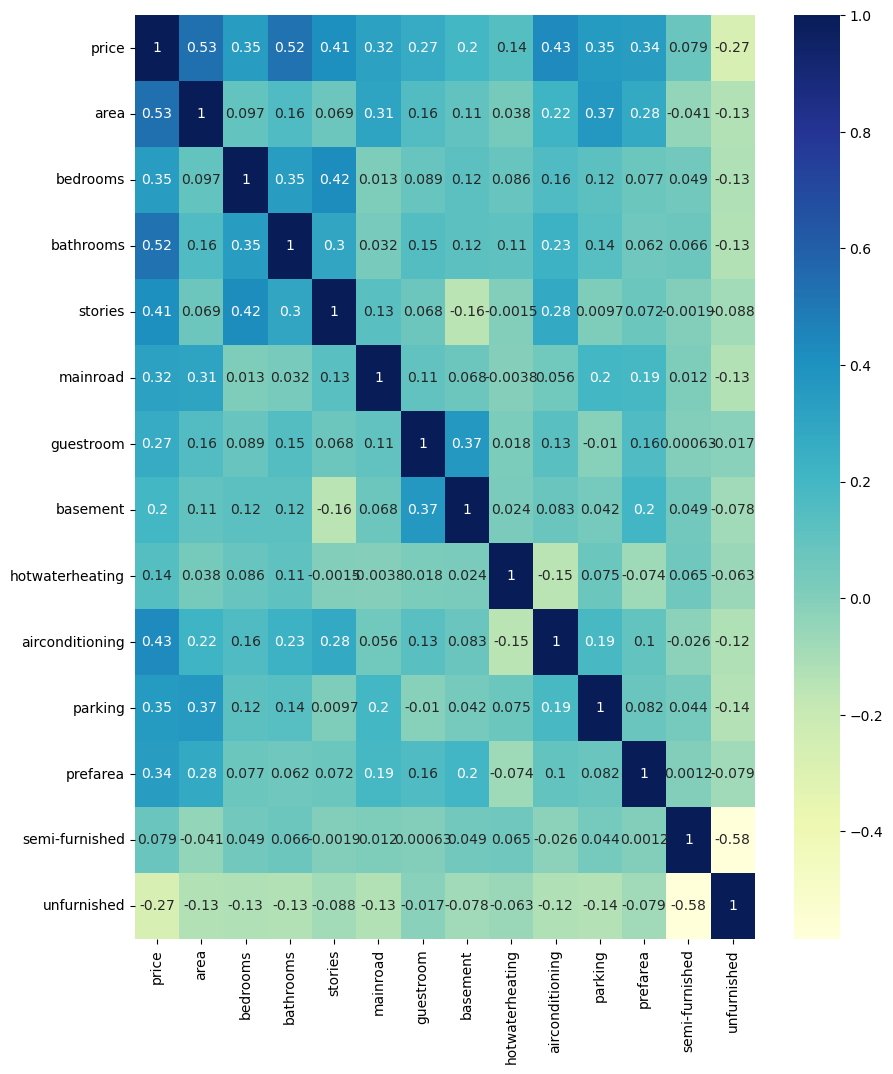

In [23]:
# use heatmap to check the correlation coefficients to see which variables are highly correlated 
plt.figure(figsize=(10,12))
sns.heatmap(df_train.corr(), annot=True, cmap ="YlGnBu")
plt.show()

`area` seems to the correlated to `price` the most. Build a scatterplot for `area` vs `price`.

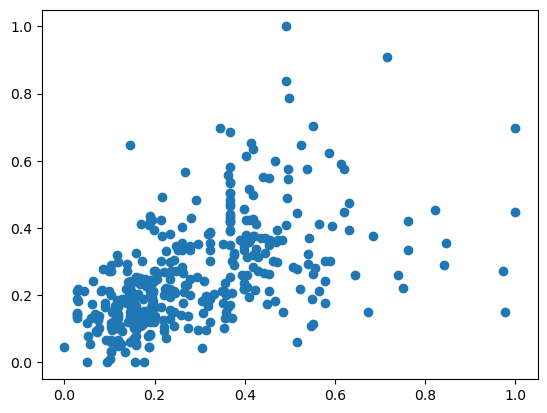

In [24]:
plt.scatter(x= df_train['area'], y= df_train['price'] )
plt.show()

 `area` is highly correlated with `price` so pick this as the first variable and try to fit a regression line to that.

## Dividing the df_train into X and y sets for model building 

In [25]:
y_train = df_train.pop('price') 
X_train = df_train

In [26]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [27]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


# Building a Linear Model using Bottom-Up approach 

In [28]:
import statsmodels.api as sm 

In [29]:
# starting with one variable i.e area 
# explicitly add constant 
X_train_sm = sm.add_constant(X_train['area'])
X_train_sm.head()

,const,area
359,1.0,0.155227
19,1.0,0.403379
159,1.0,0.115628
35,1.0,0.454417
28,1.0,0.538015


In [30]:
# create first fitted model 
lr = sm.OLS( y_train , X_train_sm).fit()

In [31]:
# check the parameters obtained 
lr.params

const    0.126894
area     0.462192
dtype: float64

0 represents intercept(constant) and 1 represents coefficient(slope)

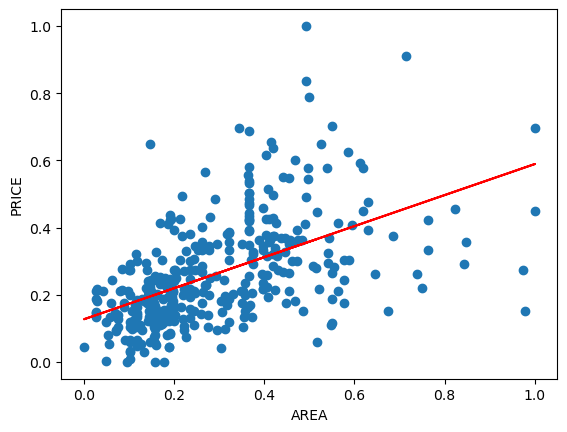

In [32]:
plt.scatter(X_train_sm.iloc[:, 1], y_train) # area vs price graph
plt.plot(X_train_sm.iloc[:, 1], 0.127 + 0.462*X_train_sm.iloc[:, 1], 'r') # area vs predicted price 
plt.xlabel('AREA')
plt.ylabel('PRICE')
plt.show()

In [33]:
# print the summary of the linear regression model obtained 
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           3.15e-29
Time:                        01:02:15   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Adding another variable:
The R-squared value obtained is `0.283`. Since there are so many variables, add the second most highly correlated variable, i.e. `bathrooms`.

In [34]:
# assign the variabke to the x_train
X_train_sm = sm.add_constant(X_train[['area','bathrooms']])
X_train_sm.head()

,const,area,bathrooms
359,1.0,0.155227,0.0
19,1.0,0.403379,0.5
159,1.0,0.115628,0.5
35,1.0,0.454417,0.5
28,1.0,0.538015,0.5


In [35]:
# build the model 
lm = sm.OLS(y_train, X_train_sm).fit()

In [36]:
# print the params 
lm.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

`price` = 0.104589 + 0.398396 ⋅ `area` + 0.298374 ⋅ `bathrooms`

In [37]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           2.51e-54
Time:                        01:02:16   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model is improved with value of adjusted R-squared as its value has gone up to `0.477` from `0.281`.
now add another variable, `bedrooms`.

In [38]:
X_train_sm = sm.add_constant(X_train[['area','bathrooms','bedrooms']])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

`price` = 0.104589 + 0.398396 ⋅ `area` + 0.298374 ⋅ `bathrooms` + 0.181863 ⋅ `bedrooms`

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           3.12e-57
Time:                        01:02:17   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# add another variable 
X_train_sm = sm.add_constant(X_train[['area','bathrooms','bedrooms','airconditioning']])
X_train_sm.head()

,const,area,bathrooms,bedrooms,airconditioning
359,1.0,0.155227,0.0,0.4,0
19,1.0,0.403379,0.5,0.4,1
159,1.0,0.115628,0.5,0.4,1
35,1.0,0.454417,0.5,0.4,1
28,1.0,0.538015,0.5,0.8,0


In [41]:
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     118.5
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           2.77e-65
Time:                        01:02:17   Log-Likelihood:                 319.19
No. Observations:                 381   AIC:                            -628.4
Df Residuals:                     376   BIC:                            -608.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0397      0.017      2.323      0.021       0.006       0.073
area                0.3546      0.031     11.530      0.000       0.294       0.415
bathrooms           0.2329      0.025      9.370      0.000       0.184       0.282
bedrooms            0.1598      0.039      4.066      0.000       0.083       0.237
airconditioning     0.0828      0.012      6.691      0.000       0.058       0.107
==============================================================================
Omnibus:                       57.748   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.632
Skew:                           0.761   Prob(JB):                     1.30e-30
Kurtosis:                       5.520   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Adding one variable everytime would be very tedious. Let's move to Top-down Approach 

# Building the model using Top-Down approach 
start off with all the vars and keep removing one at a time based on significance and VIF

In [42]:
# checking all the columns of the dataframe 
X_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [43]:
# Build the model 
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [44]:
lm_1 = sm.OLS(y_train, X_train_sm).fit()
lm_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

const = 0.020033 ( the price of house when all vars are 0 ) <br>
furnished = -0.031006 (Price drops by ~0.031 if house is unfurnished) <br>

In [45]:
# statistical summary of the model 
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           8.83e-83
Time:                        01:02:18   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Drop the vars based on significance (p value) and multicollinearity (VIF):

Variance Inflation Factor(VIF), gives a basic quantitative idea about how much the feature variables are correlated with each other. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a DataFrame that wil contain all the names of the feature vars and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


VIF < 5 then keep the variable <br>
VIF > 5 then drop the variable <br>
VIF = 5 then r2 = 0.8 the var is considered worth inspecting 

### Dropping the variable and updating the model

We could have:
- high p-value , high VIF (drop the variable)
- high-low:
    - high p-value , low VIF (firstly drop this first then check the p-value and VIFs again)
    - low p-value , high VIF (secondly drop this and follow the above step )
- low p-value , low VIF (no need to drop this variable )

From the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.938`. So drop this variables.


In [48]:
# Dropping highly insignificant variable i.e semi-furnished 
X = X_train.drop('semi-furnished', axis = 1)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [49]:
# update the model 
X_train_sm = sm.add_constant(X)
lm_2 = sm.OLS(y_train , X_train_sm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           1.07e-83
Time:                        01:02:19   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# calculate the VIF again for the updated model 
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


Notice, after dropping semi-furnished var, VIF values of other vars has also dropped .
Some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.
- the variable `bedroom` has a significantly high VIF (`6.59`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

In [51]:
# drop highly correlated and insignificant var
X = X.drop('bedrooms',axis=1)
X.head()

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.0,0.000000,1,0,0,0,0,0.333333,0,1
19,0.403379,0.5,0.333333,1,0,0,0,1,0.333333,1,0
159,0.115628,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.454417,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.538015,0.5,0.333333,1,0,1,1,0,0.666667,0,1


In [52]:
# update the model 
X_train_sm = sm.add_constant(X)
lm_3 = sm.OLS(y_train, X_train_sm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           2.73e-84
Time:                        01:02:22   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# calculating vif for the updated model 
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif 

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


from the summary,one of the vars have a high p-value that is `basement` has a p-value of 0.03. drop this as well .

In [54]:
X = X.drop('basement', axis=1)
X.head()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.0,0.000000,1,0,0,0,0.333333,0,1
19,0.403379,0.5,0.333333,1,0,0,1,0.333333,1,0
159,0.115628,0.5,0.000000,1,1,0,1,0.000000,0,0
35,0.454417,0.5,1.000000,1,0,0,1,0.666667,0,0
28,0.538015,0.5,0.333333,1,0,1,0,0.666667,0,1


In [55]:
# update the model and cal vif 
X_train_sm = sm.add_constant(X)
lm_4 = sm.OLS(y_train, X_train_sm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           3.13e-84
Time:                        01:02:23   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014      2.958      0.003       0.014       0.071
area                0.2335      0.030      7.772      0.000       0.174       0.293
bathrooms           0.2019      0.021      9.397      0.000       0.160       0.244
stories             0.1081      0.017      6.277      0.000       0.074       0.142
mainroad            0.0497      0.014      3.468      0.001       0.022       0.078
guestroom           0.0402      0.013      3.124      0.002       0.015       0.065
hotwaterheating     0.0876      0.022      4.051      0.000       0.045       0.130
airconditioning     0.0682      0.011      6.028      0.000       0.046       0.090
parking             0.0629      0.018      3.482      0.001       0.027       0.098
prefarea            0.0637      0.012      5.452      0.000       0.041       0.087
unfurnished        -0.0337      0.010     -3.295      0.001      -0.054      -0.014
==============================================================================
Omnibus:                       97.054   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.034
Skew:                           1.124   Prob(JB):                     1.18e-70
Kurtosis:                       6.902   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif 

,Features,VIF
3,mainroad,4.55
0,area,4.54
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
9,unfurnished,1.33
4,guestroom,1.30
5,hotwaterheating,1.12


The VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using this model only that is lm_4.<br>
The removed feature vars are : `semi-furnished`, `bedrooms` , `basement`

# Residual Analysis of the training dataset

now to check if the error terms are also normally distributed ( one of the major assumptions of linear regression), plot the histogram of the error terms and see what it looks like.
Residuls = actual(y) - predicted(y)

In [57]:
# predict the price based on the training set using the final model 
y_train_pred = lm_4.predict(X_train_sm)

In [58]:
# calculate the residuals 
res = y_train - y_train_pred

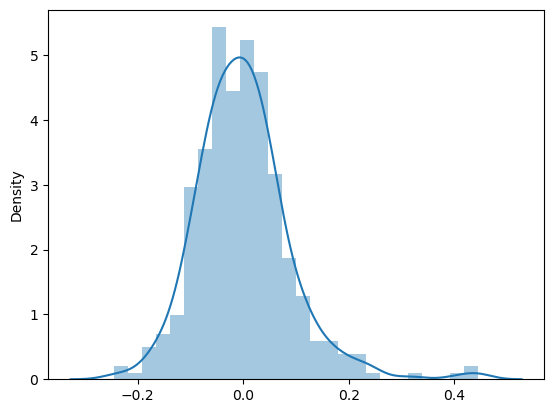

In [59]:
# plot the histogram 
sns.distplot(res)
plt.show()

the error terms are centred around zero hence they are considered normally distributed 

# Prediction and Evaluation of model on testing dataset 

transform the test dataset using the scaler that has been fit on the training set 

In [60]:
# transform the test set 
num_vars = ['price', 'area', 'bedrooms', 'bathrooms','stories' ,'parking' ]
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [61]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
# dividing the df_test into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [63]:
# remove the unnecessary vars 
X_test = X_test.drop(['semi-furnished', 'bedrooms','basement'], axis = 1)
X_test.head()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,0.091869,0.0,0.333333,1,0,0,0,0.000000,1,0
54,0.366420,0.5,0.333333,1,1,0,1,0.333333,0,0
171,0.742080,0.0,0.000000,1,0,0,0,0.333333,1,0
244,0.306582,0.0,0.333333,1,1,0,0,0.000000,1,0
268,0.274023,0.0,0.333333,1,0,0,1,0.000000,0,0


In [64]:
# add contsant and build the model 
X_test_sm = sm.add_constant(X_test)
y_test_pred = lm_4.predict(X_test_sm)

In [65]:
# as y_test_pred is a series we cant use summary , so use r2_score metric 
from sklearn.metrics import r2_score
r2_score(y_true = y_test , y_pred = y_test_pred)

0.660134403021964

Text(0.5, 1.0, 'Actual vs Predicted Prices (Test Set)')

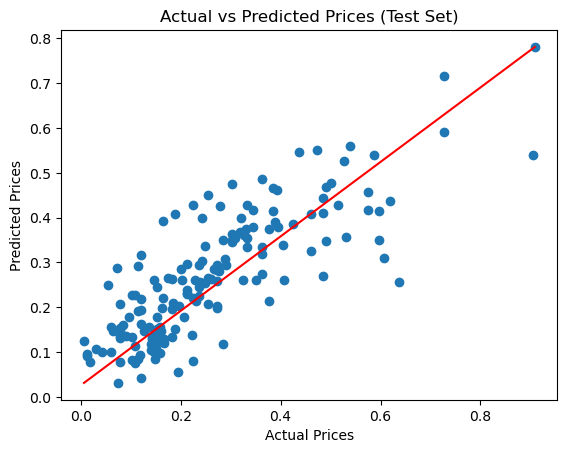

In [66]:
# scatter plot to visualise the model prediction matches the actual values 
plt.scatter(y_test, y_test_pred,)
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min() , y_test_pred.max()], 'r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Test Set)")

- Most blue dots are close to the red line => model is predicting prices accurately.

- The spread is evenly distributed around the line => no major bias toward overpredicting or underpredicting.

- As values increase, predictions still follow the same trend => model generalizes across the full range.



<Axes: ylabel='Density'>

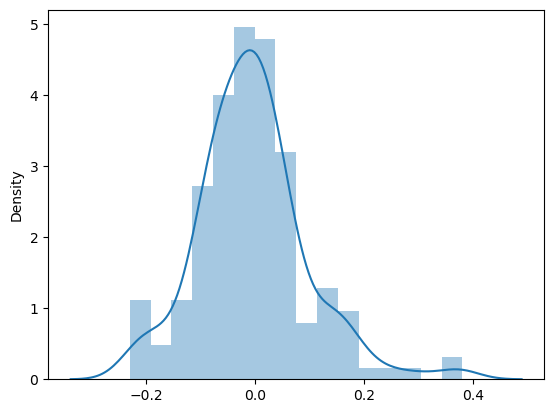

In [67]:
# residual analysis 
res = y_test - y_test_pred
sns.distplot(res)

- The peak of the distribution is close to 0, which is perfect.
- The shape is close to bell-shaped (normal distribution
- Very few residuals lie far from 0 that mean the predictions are mostly accurate and consistent.